In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

def load_webis_tldr_17():
    """Load the Webis-TLDR-17 dataset."""
    dataset = load_dataset("webis/tldr-17")
    return dataset

webis_tldr = load_webis_tldr_17()

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for webis/tldr-17 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/webis/tldr-17
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/3848330 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
sample_size = 10000
df = pd.DataFrame(webis_tldr['train'].shuffle(seed=42).select(range(sample_size)))

<ipython-input-33-6ab84cf3a385>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




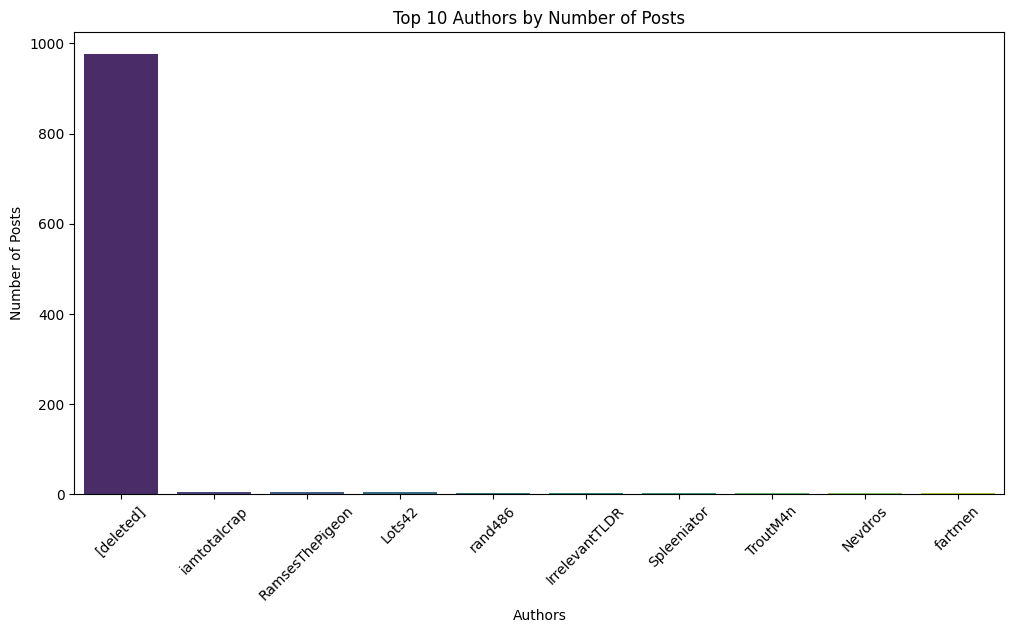

<ipython-input-33-6ab84cf3a385>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




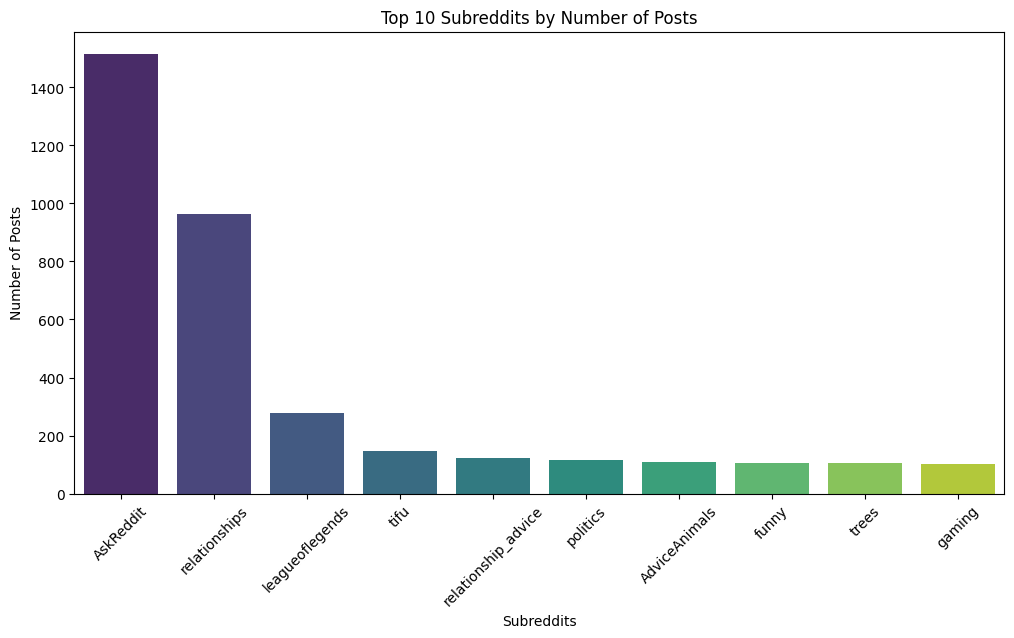

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 authors
author_counts = df['author'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette='viridis')
plt.title('Top 10 Authors by Number of Posts')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.ylabel('Number of Posts')
plt.xlabel('Authors')
plt.show()

# Top 10 subreddits
subreddit_counts = df['subreddit'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette='viridis')
plt.title('Top 10 Subreddits by Number of Posts')
plt.xticks(rotation=45)
plt.ylabel('Number of Posts')
plt.xlabel('Subreddits')
plt.show()


<ipython-input-38-661ef8bc35bc>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




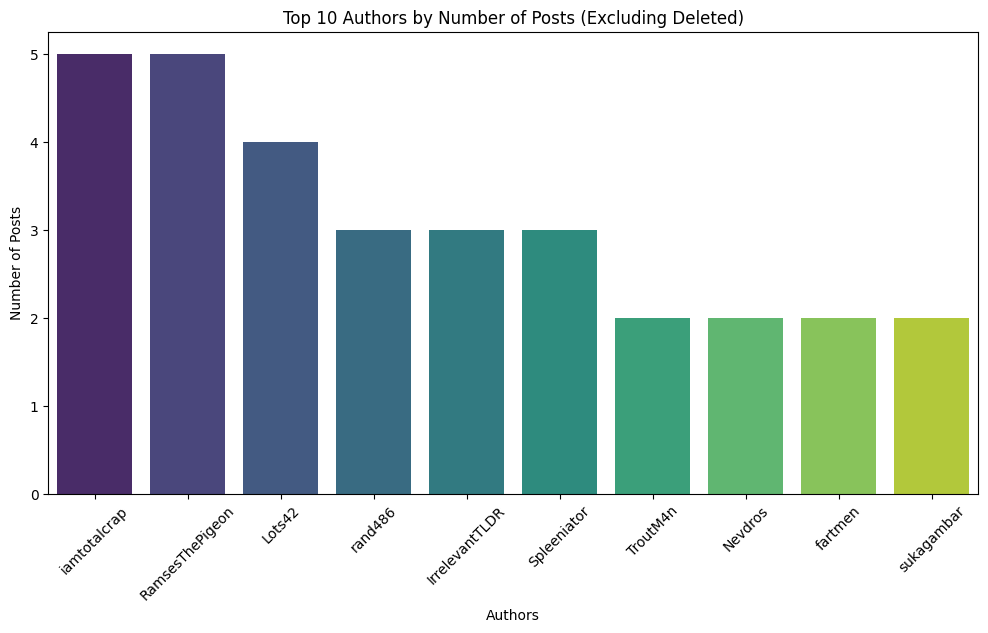

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_filtered = df[df['author'] != '[deleted]']
author_counts = df_filtered['author'].value_counts().nlargest(10)
# Plotting the top 10 authors by number of posts
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette='viridis')
plt.title('Top 10 Authors by Number of Posts (Excluding Deleted)')
plt.xticks(rotation=45)
plt.ylabel('Number of Posts')
plt.xlabel('Authors')
plt.show()

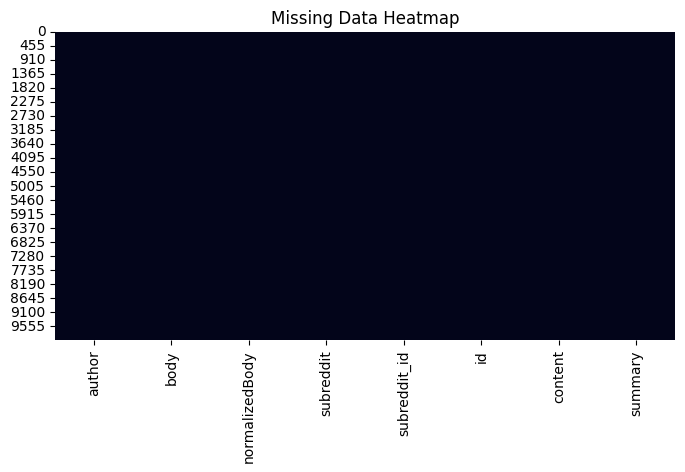

Missing values in each column:
 author            0
body              0
normalizedBody    0
subreddit         0
subreddit_id      0
id                0
content           0
summary           0
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
missing = df.isnull().sum() / len(df) * 100
# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()
# Check for missing values in key columns
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

In [ ]:
sample_size=500
sample = webis_tldr['train'].shuffle(seed=42).select(range(sample_size))

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from community import  community_louvain
from collections import defaultdict
def build_graph(data):
    G = nx.Graph()
    subreddit_users = defaultdict(set)

    for item in data:
        user = item['author']
        subreddit = item['subreddit']
        subreddit_users[subreddit].add(user)
        if user not in G:
            G.add_node(user, subreddits=set())
        G.nodes[user]['subreddits'].add(subreddit)

    for subreddit, users in subreddit_users.items():
        users = list(users)
        for i in range(len(users)):
            for j in range(i + 1, len(users)):
                G.add_edge(users[i], users[j])

    return G
# Build the graph
G = build_graph(sample)

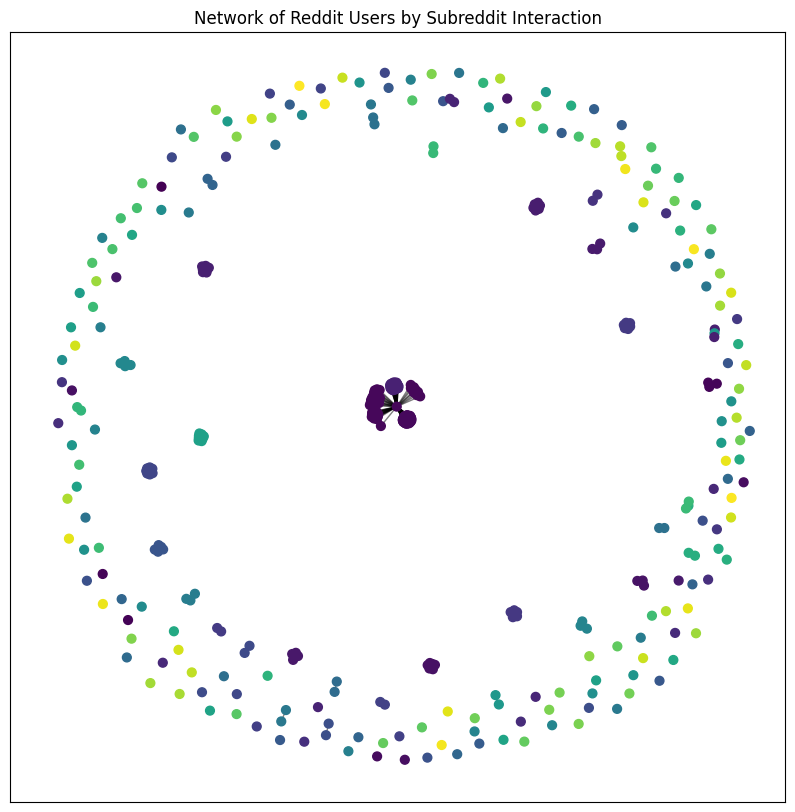

In [ ]:
import matplotlib.pyplot as plt

def detect_and_visualize_communities(G):
    # Apply the Louvain method for community detection
    partition = community_louvain.best_partition(G)
    pos = nx.spring_layout(G)
    cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), node_size=40, cmap=cmap)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title('Network of Reddit Users by Subreddit Interaction')
    plt.show()

    return partition

G = build_graph(sample)
partition = detect_and_visualize_communities(G)


In [ ]:
# Map nodes to their respective communities
community_dict = {}
for node, community in partition.items():
    if community not in community_dict:
        community_dict[community] = []
    community_dict[community].append(node)

print(community_dict)


{0: ['HgUuGiGtIaEr'], 1: ['st_gulik'], 2: ['ErusSenex'], 3: ['booshyschmoozy', 'BoltonSauce', 'Dancecomander'], 4: ['[deleted]', 'paulwal', 'Cykuta', 'RamenRain', 'Frogbert', 'Gravenscar', 'Driftnasty240', 'AlbooGaming', 'Kazhawrylak', 'lessthan3man', 'australian_throwaway', 'jensen36', 'Kieranderp', 'chronicstomachpain', 'iiYop', 'stonergirl79', 'Linktank', 'Reaper72_1', 'fakestreet1234', 'kylec_1991', 'JohnBrookz', 'marmaladeontoast', 'fettleif', '1ceyou', 'honestyisthebestcure', 'Austin-tatious', 'stellarfury', 'ex_oxy_heroin_user', 'Joopz34', 't-rexatron', 'Dyspr0', 'The_Average_Hero', 'C9LostToDig', 'Derptionary', 'Seabass_Says', 'shizam237', 'poko23', 'whyLibrariesAreDying', 'jolvie', 'throwawaymarriages', 'cheapleaguemachine'], 5: ['RuthlessRuben', 'shinytoyguns617', 'throwaway438712sdfjh', 'likeafuckingninja', 'f14tomcat', 'brohio11', 'Wooden_hampster', 'Babboon7', 'HunterIrked', 'ilynia', 'Loopbot75', 'COFFEE_IS_4_CLOSERS', 'TacoTweets', 'redlaWw', 'BasicUserAccount42', 'Skeet

In [ ]:
def extract_community_topics(G, community_dict):
    community_topics = {}
    for community, nodes in community_dict.items():
        topic_counter = {}
        for node in nodes:
            subreddits = G.nodes[node].get('subreddits', [])
            for subreddit in subreddits:
                if subreddit in topic_counter:
                    topic_counter[subreddit] += 1
                else:
                    topic_counter[subreddit] = 1
        sorted_topics = sorted(topic_counter.items(), key=lambda item: item[1], reverse=True)
        community_topics[community] = sorted_topics[:5]  # Top 5 topics
    return community_topics

community_topics = extract_community_topics(G, community_dict)
print(community_topics)


{0: [('Guitar', 1)], 1: [('rpg', 1)], 2: [('GameDeals', 1)], 3: [('asoiaf', 3)], 4: [('leagueoflegends', 17), ('reddit.com', 5), ('IAmA', 4), ('Fitness', 4), ('relationship_advice', 4)], 5: [('AskReddit', 81)], 6: [('Anxiety', 1)], 7: [('askseddit', 1)], 8: [('PS4', 1)], 9: [('lgbt', 1)], 10: [('atheism', 6)], 11: [('TalesFromTheFrontDesk', 3)], 12: [('BDSMcommunity', 1)], 13: [('battlestations', 1)], 14: [('depression', 4)], 15: [('LifeProTips', 1)], 16: [('electronic_cigarette', 3)], 17: [('explainlikeimfive', 6)], 18: [('MensRights', 2)], 19: [('WTF', 7)], 20: [('relationships', 35)], 22: [('askscience', 2)], 23: [('Bass', 1)], 24: [('SubredditDrama', 1)], 25: [('headphones', 1)], 26: [('GrandTheftAutoV', 1)], 27: [('COPYRIGHT', 1)], 28: [('gamecollecting', 1)], 29: [('MDMA', 1)], 30: [('seduction', 1)], 31: [('Mariners', 1)], 32: [('GlobalOffensive', 2)], 33: [('swtor', 1)], 34: [('Random_Acts_Of_Amazon', 1)], 35: [('funny', 6)], 36: [('mtgcube', 1)], 37: [('technology', 6)], 38: [

In [ ]:
for node in G.nodes(data=True):
    print(node)  # This will show each node and its attributes

('HgUuGiGtIaEr', {'subreddits': {'Guitar'}})
('st_gulik', {'subreddits': {'rpg'}})
('ErusSenex', {'subreddits': {'GameDeals'}})
('booshyschmoozy', {'subreddits': {'asoiaf'}})
('[deleted]', {'subreddits': {'asktrp', 'IAmA', 'chickflixxx', 'sex', 'GiftIdeas', 'boardgames', 'nsfwforhire', 'cripplingalcoholism', 'nursing', 'techsupport', 'footballmanagergames', 'Drugs', 'reddit.com', 'geek', 'conspiracy', 'AskReddit', 'gratefuldead', 'Smite', 'DestinyTheGame', 'dogs', 'LongDistance', 'self', 'talesfromtechsupport', 'trees', 'relationships', 'Minecraft', 'leagueoflegends', 'KindVoice', 'nonmonogamy', 'Fitness', 'offmychest', 'relationship_advice'}})
('RuthlessRuben', {'subreddits': {'AskReddit'}})
('randomuser4323', {'subreddits': {'Anxiety'}})
('slammajamma13', {'subreddits': {'askseddit'}})
('agnosticbeliever138', {'subreddits': {'PS4'}})
('gagaoolala', {'subreddits': {'lgbt'}})
('Scoopable', {'subreddits': {'atheism'}})
('Boogada42', {'subreddits': {'TalesFromTheFrontDesk'}})
('Beekeeper

In [ ]:
import numpy as np
import networkx as nx
from community import community_louvain

def calculate_engagement_metrics(G):
    partition = community_louvain.best_partition(G)
    community_metrics = {}
    for comm_id in set(partition.values()):
        subgraph = G.subgraph([node for node, com in partition.items() if com == comm_id])
        density = nx.density(subgraph)
        degree_centrality = nx.degree_centrality(subgraph)
        average_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
        community_metrics[comm_id] = {
            'density': density,
            'average_degree_centrality': average_degree_centrality
        }
    return community_metrics


def calculate_bridge_users(G):
    # Calculate betweenness centrality for all nodes
    betweenness = nx.betweenness_centrality(G)
    threshold = np.percentile(list(betweenness.values()), 90)  #
    bridge_users = {node: cent for node, cent in betweenness.items() if cent >= threshold}
    return bridge_users

bridge_users = calculate_bridge_users(G)
engagement_metrics = calculate_engagement_metrics(G)


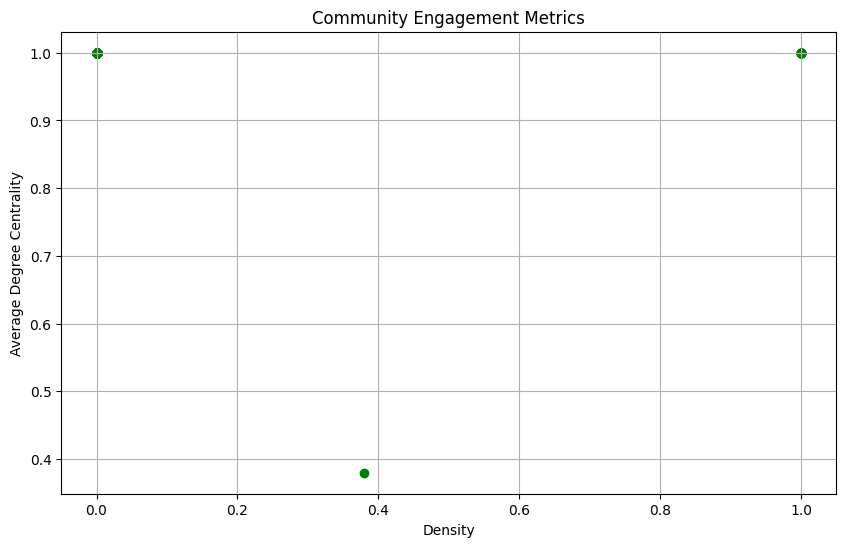

In [ ]:
def plot_community_engagement(engagement_metrics):
    densities = [metrics['density'] for metrics in engagement_metrics.values()]
    centralities = [metrics['average_degree_centrality'] for metrics in engagement_metrics.values()]

    plt.figure(figsize=(10, 6))
    plt.scatter(densities, centralities, color='green')
    plt.xlabel('Density')
    plt.ylabel('Average Degree Centrality')
    plt.title('Community Engagement Metrics')
    plt.grid(True)
    plt.show()

plot_community_engagement(engagement_metrics)


In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes(data=True))[:5])
print("Edges:", list(G.edges())[:5])


Number of nodes: 449
Number of edges: 4320
Nodes: [('HgUuGiGtIaEr', {'subreddits': {'Guitar'}}), ('st_gulik', {'subreddits': {'rpg'}}), ('ErusSenex', {'subreddits': {'GameDeals'}}), ('booshyschmoozy', {'subreddits': {'asoiaf'}}), ('[deleted]', {'subreddits': {'asktrp', 'IAmA', 'chickflixxx', 'sex', 'GiftIdeas', 'boardgames', 'nsfwforhire', 'cripplingalcoholism', 'nursing', 'techsupport', 'footballmanagergames', 'Drugs', 'reddit.com', 'geek', 'conspiracy', 'AskReddit', 'gratefuldead', 'Smite', 'DestinyTheGame', 'dogs', 'LongDistance', 'self', 'talesfromtechsupport', 'trees', 'relationships', 'Minecraft', 'leagueoflegends', 'KindVoice', 'nonmonogamy', 'Fitness', 'offmychest', 'relationship_advice'}})]
Edges: [('booshyschmoozy', 'Dancecomander'), ('booshyschmoozy', 'BoltonSauce'), ('[deleted]', 'RobotBuddha'), ('[deleted]', 'brazendynamic'), ('[deleted]', 'Themaskedotaku')]


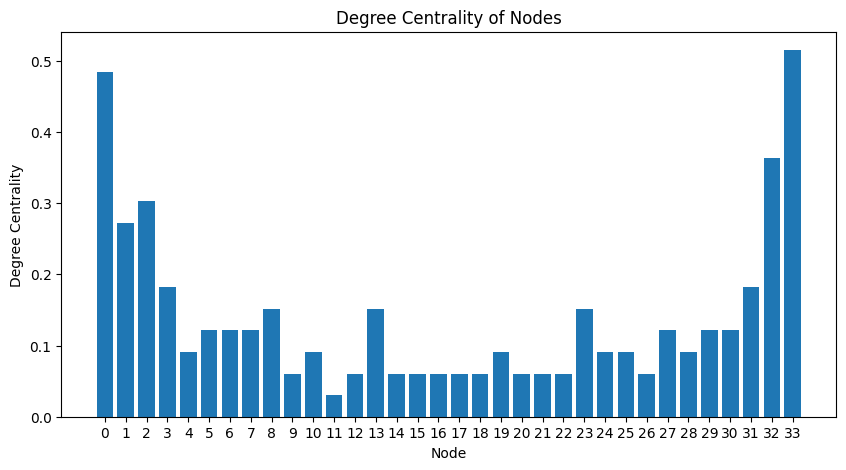

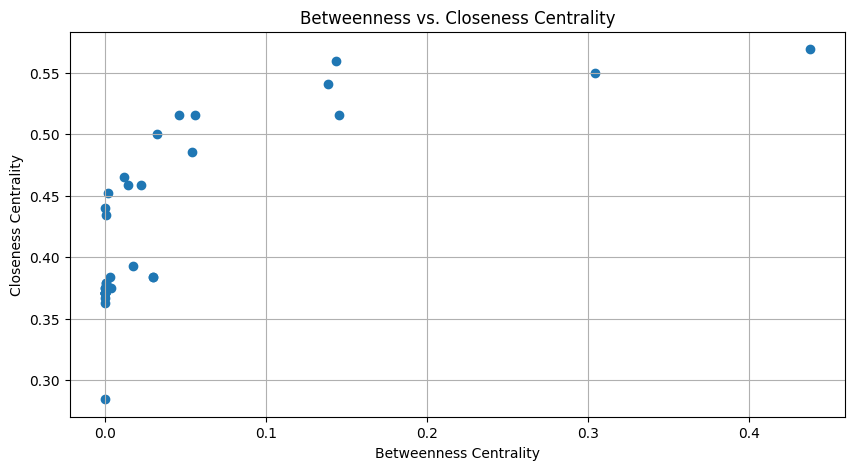

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculating metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualization of Degree Centrality
plt.figure(figsize=(10, 5))
plt.bar(range(len(degree_centrality)), list(degree_centrality.values()), align='center')
plt.xticks(range(len(degree_centrality)), list(degree_centrality.keys()))
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes')
plt.show()

# Scatter Plot for Betweenness vs. Closeness
plt.figure(figsize=(10, 5))
plt.scatter(list(betweenness_centrality.values()), list(closeness_centrality.values()))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Closeness Centrality')
plt.title('Betweenness vs. Closeness Centrality')
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objs as go

# Data preparation
nodes = list(G.nodes())
degree = [degree_centrality[node] * 100 for node in nodes]  # Scaling for better visualization
betweenness = [betweenness_centrality[node] for node in nodes]
closeness = [closeness_centrality[node] for node in nodes]

# Scatter plot for centrality measures
trace = go.Scatter(
    x=betweenness,
    y=closeness,
    mode='markers',
    marker=dict(size=degree, color=degree, showscale=True),
    text=nodes
)

layout = go.Layout(
    title='Centrality Measures Comparison',
    xaxis=dict(title='Betweenness Centrality'),
    yaxis=dict(title='Closeness Centrality'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


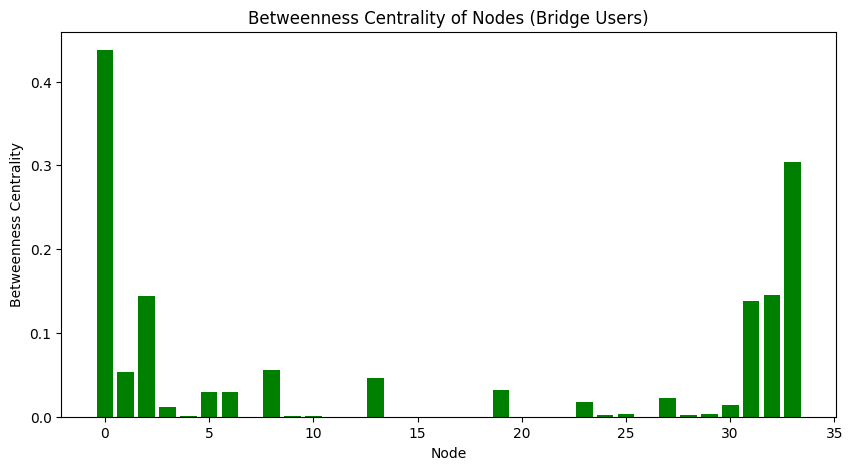

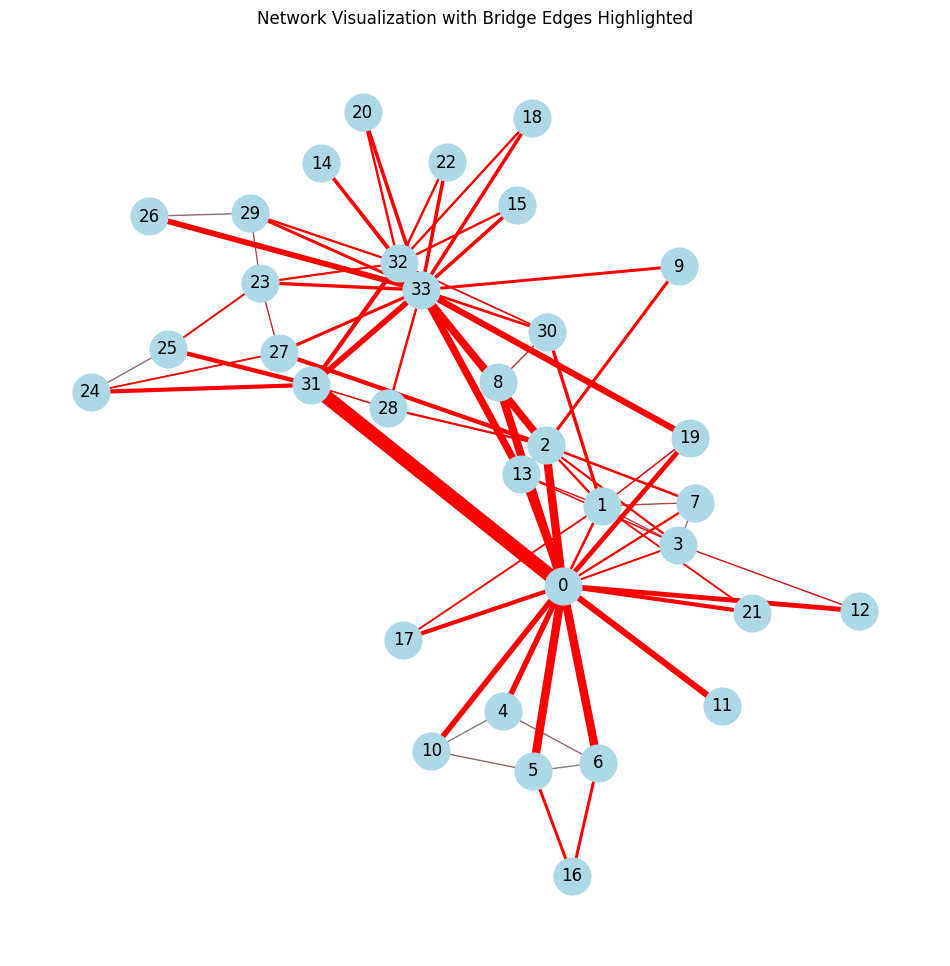

In [ ]:
# Calculate metrics
betweenness_centrality = nx.betweenness_centrality(G)  # Nodes
edge_betweenness = nx.edge_betweenness_centrality(G)  # Edges


# Visualization of Betweenness Centrality (Bridge Users)
plt.figure(figsize=(10, 5))
plt.bar(range(len(betweenness_centrality)), list(betweenness_centrality.values()), color='g')
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes (Bridge Users)')
plt.show()


# Network Visualization Highlighting Bridge Edges
pos = nx.spring_layout(G)

# Normalizing edge betweenness values for width
eb_values = np.array(list(edge_betweenness.values()))
eb_scaled = (eb_values - eb_values.min()) / (eb_values.max() - eb_values.min()) * 10
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=1, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=edge_betweenness.keys(), width=eb_scaled, edge_color='red')
plt.title('Network Visualization with Bridge Edges Highlighted')
plt.axis('off')
plt.show()